In [14]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import h5py
import numpy as np
from tqdm import tqdm

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
from dm21cm.utils import abscs

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file(f"{WDIR}/matplotlibrc")

In [2]:
data_dir = os.environ['DM21CM_DATA_DIR']

In [3]:
os.listdir(data_dir)

['phot_scat.h5',
 'abscissas.h5',
 'pwave_ann_rate.h5',
 'elec_dep.h5',
 'phot_dep.h5',
 'phot_prop.h5',
 'elec_scat.h5']

In [29]:
with h5py.File(f"{data_dir}/elec_scat.h5", 'r') as hf:
    tf_scat = hf['data'][()]
    print(hf['axes'][()])

with h5py.File(f"{data_dir}/phot_prop.h5", 'r') as hf:
    tf_prop = hf['data'][()]

[b'rs' b'Ein' b'nBs' b'x' b'out']


In [25]:
np.searchsorted(abscs['photE'], 1e4)

239

In [31]:
i_rs = np.random.randint(0, 10)
i_x = np.random.randint(0, 10)
i_nBs = np.random.randint(0, 10)
print(i_rs, i_x, i_nBs)
i_E = 239

spec_prop = tf_prop[i_rs, i_E, i_nBs, i_x]
spec_scat = tf_scat[i_rs, i_E, i_nBs, i_x]

3 6 6


[]

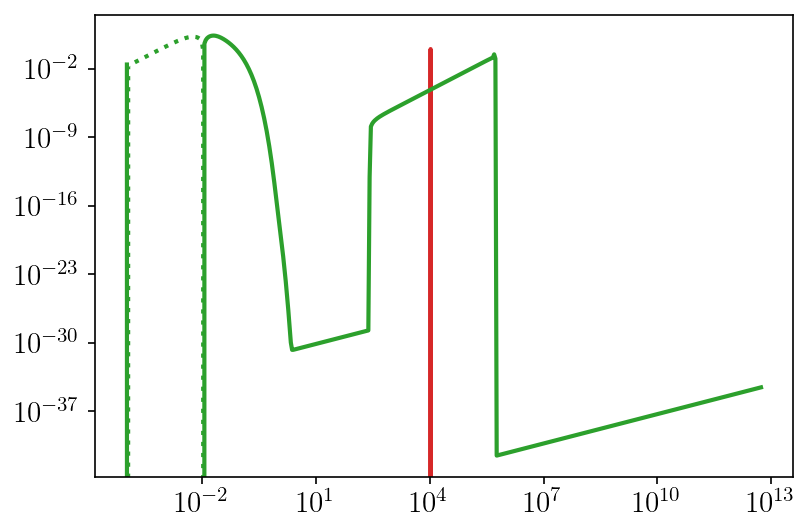

In [32]:
plt.plot(abscs['photE'], spec_prop)
plt.plot(abscs['photE'], spec_scat)
plt.plot(abscs['photE'], -spec_scat, color='C1', ls=':')
plt.loglog()